In [80]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [81]:
from simpledbf import Dbf5
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 200

Total fires: 63


,Unnamed: 0,NAMN,Producent,GISHektar,Lannamn,CenterX,CenterY,Aktualitet,Kommunnamn,Metod,...,shape_STLe,link,quality,comments,zone,road_distance,burntX,burntY,unburntX,unburntY
OBJECTID,,,,,,,,,,,,,,,,,,,,,
2.0,1,NaN,Skogsstyrelsen,0.0,Jämtlands län,7014643.0,520492.0,NaN,Ragunda,Manuell kartering - satellit,...,231.143215,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7014643&y=520492&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
16.0,15,NaN,Skogsstyrelsen,97.0,Västerbottens län,7234732.0,754306.0,NaN,Skellefteå,Manuell kartering - satellit,...,5030.334674,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7234732&y=754306&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
17.0,16,NaN,Skogsstyrelsen,1.0,Västerbottens län,7197206.0,771349.0,NaN,Skellefteå,Manuell kartering - satellit,...,471.423463,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7197206&y=771349&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
18.0,17,NaN,Skogsstyrelsen,0.0,Västerbottens län,7180967.0,686168.0,NaN,Lycksele,Manuell kartering - satellit,...,200.358786,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7180967&y=686168&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
19.0,18,NaN,Skogsstyrelsen,6.0,Västerbottens län,7171921.0,641184.0,NaN,Lycksele,Manuell kartering - satellit,...,1276.283297,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7171921&y=641184&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
20.0,19,NaN,Skogsstyrelsen,4.0,Västerbottens län,7141638.0,669472.0,NaN,Lycksele,Manuell kartering - satellit,...,878.248993,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7141638&y=669472&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
21.0,20,NaN,Skogsstyrelsen,0.0,Västerbottens län,7117167.0,617501.0,NaN,Åsele,Manuell kartering - satellit,...,107.873096,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7117167&y=617501&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
22.0,21,NaN,Skogsstyrelsen,1.0,Västerbottens län,7110876.0,628490.0,NaN,Åsele,Manuell kartering - satellit,...,384.241052,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7110876&y=628490&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
23.0,22,NaN,Skogsstyrelsen,0.0,Jämtlands län,7134913.0,508479.0,NaN,Strömsund,Manuell kartering - satellit,...,226.532259,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=7134913&y=508479&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


Total fires: 63


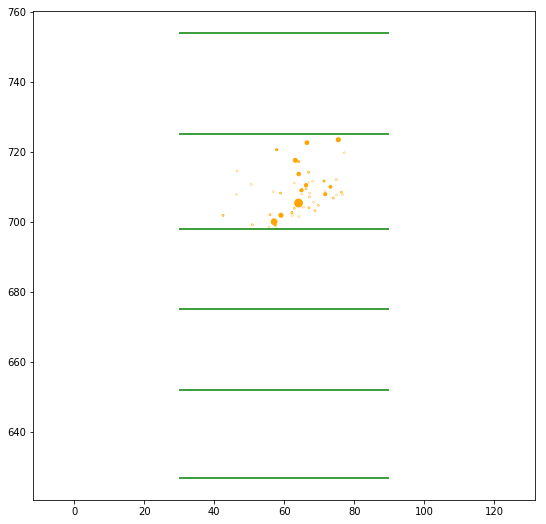

In [106]:
def plot(df):
    lines = [627,652,675,698,725,754]
    x = df["CenterY"]/10000
    y = df["CenterX"]/10000
    s = df["GISHektar"]/10
    print("Total fires: {}".format(len(df.index)))
    #display(df.head())
    plt.figure(figsize=(9,9))
    plt.scatter(x,y,s, color = 'orange', linewidths = 2)
    plt.hlines(lines,30,90, color = 'green')
    plt.axis('equal')
    plt.show()
    
def show_image(area): display(Image(filename='images/area_{}.png'.format(area)))
    
def write(df):
    og = pd.read_csv("./data/df.csv", index_col=0)
    og.update(df)
    og.to_csv("./data/df.csv")
    
def read(): return pd.read_csv("./data/df.csv", index_col = 'OBJECTID')

df = read()


#df = df[df.GISHektar > 15]
#df = df[df.GISHektar <= 5]
#df = df[df.GISHektar > 2]
df = df[df.zone == 4]
#df = df[df.index.isin([3, 53,54,124,138])]

#df = df[df.NAMN.notnull()]

#df = df[df.quality > 0]
#df = df.iloc[0]
#df.quality = 3
#df.comments = "This one looks to have obvious burning"
#df.road_distance = 840

#write(df)

print("Total fires: {}".format(len(df.index)))
display(df)
plot(df)

In [20]:
def read_dbf(): return Dbf5('data/brand.dbf').to_dataframe()
def setup_columns(df):
    df['link'] = "https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x="+df.CenterX.astype(str)+"&y="+df.CenterY.astype(str)+"&scale=37502.2872&bg=KARTA"
    df['quality'] = np.nan
    df['comments'] = np.nan
    df['zone'] = np.nan
    df['road_distance'] = np.nan
    df['burntX'] = np.nan
    df['burntY'] = np.nan
    df['unburntX'] = np.nan
    df['unburntY'] = np.nan
    df['satellite_date'] = np.nan
    return df
def be_careful():
    df = read_dbf()
    df = setup_columns(df)
    df.to_csv('data/df.csv')



In [27]:

import sqlite3
import pandas as pd
class Database():
    
    def __init__(self, db_name): self.connection = self.connect(db_name)
    
    def read(self, sql): pass
    
    def connect(self,db_name): pass
    
    def insert(self, table_name, dataframe): print("yaa, inserted, get some!")
        
    def disconnect(self): pass
        
    def __del__(self): self.disconnect()
        

class SQLiteDB(Database):
    
    def connect(self,db_name): return sqlite3.connect(db_name)
    
    def read(self, sql): return pd.read_sql_query(sql, self.connection,
                                                  index_col="id")
    
    def insert(self, table_name, dataframe):
        dataframe.to_sql(table_name, self.connection,
                         if_exists="append", index = False)
        
    def disconnect(self): self.connection.close()

In [36]:
name = '/Users/johan/Documents/Programming/skogsbrand/db.sqlite3'
df = read_dbf()
#display(df)
db = SQLiteDB(name)
db.insert('fires_fire', df)
db.disconnect

<bound method SQLiteDB.disconnect of <__main__.SQLiteDB object at 0x117c5fcc0>>